Importing the necessary libraries

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

Loading and merging the rainfall data

In [189]:
rainfall_data = pd.concat(map(pd.read_csv, ['rainfall_data/Rainfall_Jan_to_Mar_2021.csv', 'rainfall_data/TS Rainfall data April 2021.csv', 'rainfall_data/TS Rainfall data May2021.csv', 'rainfall_data/TS Rainfall data June 2021.csv', 'rainfall_data/TS Rainfall data July 2021.csv', 'rainfall_data/TS Rainfall data August 2021.csv']), ignore_index=True)
rainfall_data.head()

,District,Mandal,Date,Rain (mm),Min Humidity (%),Max Humidity (%)
0,Adilabad,Bheempoor,01-Jan-21,0.0,37.8,95.7
1,Adilabad,Bheempoor,02-Jan-21,0.0,40.6,96.6
2,Adilabad,Bheempoor,03-Jan-21,0.0,45.8,97.0
3,Adilabad,Bheempoor,04-Jan-21,0.0,38.4,96.4
4,Adilabad,Bheempoor,05-Jan-21,0.0,50.7,97.0


Looking at the data

In [76]:
rainfall_data.describe()

,Rain (mm),Min Humidity (%),Max Humidity (%)
count,153059.000000,153059.000000,153059.00000
mean,3.073775,41.859009,82.62939
std,10.983815,22.290489,24.57877
min,0.000000,-1.000000,0.00000
25%,0.000000,26.100000,77.70000
50%,0.000000,40.200000,90.70000
75%,0.000000,57.300000,99.50000
max,374.400000,100.000000,100.00000


### Changes being made to the data:
- Converting the Date column to Date object
- Adding a month column from the Date column

### Grouping the data based on the District and Month and creating a DataFrame around it
- Calculating the mean/average of all the days under each month

In [192]:
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Date'])
rainfall_data['Month'] = rainfall_data['Date'].apply(lambda x:x.strftime('%B'))
df = pd.DataFrame(rainfall_data.groupby(["District", "Month"], as_index=False)[["District", "Month", "Rain (mm)", "Min Humidity (%)", "Max Humidity (%)"]].mean())
df.head()

,District,Month,Rain (mm),Min Humidity (%),Max Humidity (%)
0,Adilabad,April,0.301111,19.115370,57.319444
1,Adilabad,August,8.470789,67.292652,94.287814
2,Adilabad,February,0.082738,25.884325,74.947619
3,Adilabad,January,0.010036,39.524552,87.789785
4,Adilabad,July,14.513262,68.573118,93.815412


### Pivoting the table 
#### Based on the Rain Fall
- Converting months in the rows to columns
- Reindexing the months to be displayed in order

In [195]:
pivoted_rainfall = df.pivot_table("Rain (mm)", ["District"], ["Month"])
month_wise_rainfall_data = pivoted_rainfall.reindex(["January", "February", "March", "April", "May", "June", "July", "August"], axis="columns")
month_wise_rainfall_data

Month,January,February,March,April,May,June,July,August
District,,,,,,,,
Adilabad,0.010036,0.082738,0.017025,0.301111,0.841726,10.624074,14.513262,8.470789
Bhadradri Kothagudem,0.000000,0.000000,0.000000,2.410725,1.289824,4.261014,12.773913,6.961290
Hyderabad,0.068347,0.410268,0.000000,0.553125,1.107979,3.540417,9.439516,3.805444
Jagtial,0.038172,0.008929,0.000000,0.032593,0.136288,7.036852,15.992832,5.746237
Jangaon,0.003226,0.005655,0.000000,0.628333,0.389716,7.580833,12.242204,6.737097
Jayashankar,0.000000,0.126299,0.000000,1.697576,0.635010,7.496970,12.169501,6.104399
Jogulamba Gadwal,0.180108,0.045536,0.000000,0.200556,1.460816,2.937778,5.848118,3.389516
Kamareddy,0.237243,0.011039,0.020235,0.246970,0.918569,10.101364,11.526979,7.230352
Karimnagar,0.084476,0.039732,0.000000,0.272500,0.240559,8.057500,12.740726,7.515121


### Displaying the Month-Wise Average of Rain Fall for all districts
- X Axis: District Names
- Y Axis: Rain Fall Average in mm
- Each bar represents a month

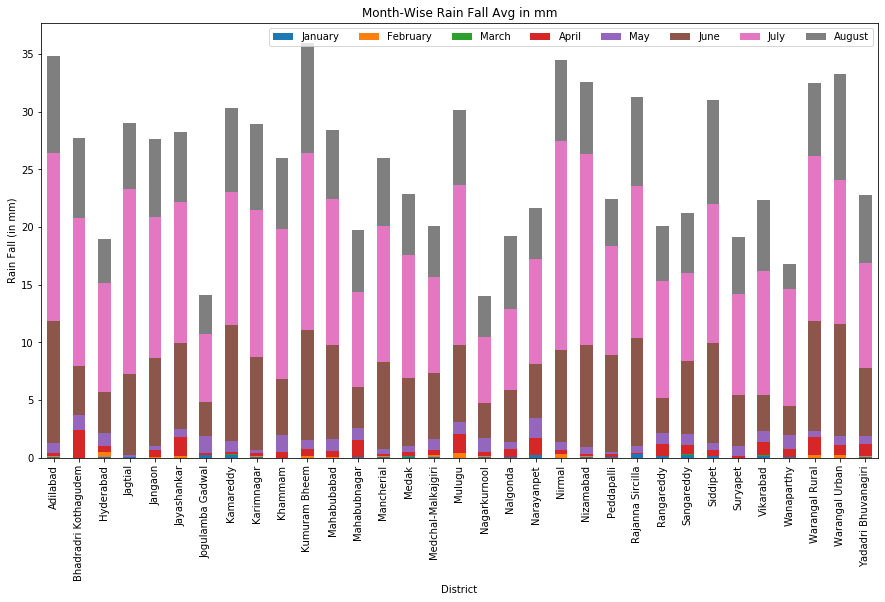

In [186]:
fig, ax = plt.subplots()
month_wise_rainfall_data.plot(kind="bar", figsize=(15, 8), title="Month-Wise Rain Fall Avg in Districts", stacked=True, ax=ax)
ax.set(xlabel="District", ylabel="Rain Fall (in mm)")
plt.legend(loc="upper right", ncol=len(month_wise_rainfall_data.columns))

# Inferences Drawn from the above graph:
- Nirmal has the highest rainfall average in July
- Adilabad has the highest rainfall average in June
- Kumuram Bheem has the least rainfall average
- Nagarkurnool has the least rainfall average

In [219]:
pivoted_rainfall = df.pivot_table("Rain (mm)", ["District"], ["Month"])
month_wise_rainfall_data = pivoted_rainfall.reindex(["January", "February", "March", "April", "May", "June", "July", "August"], axis="columns")
month_wise_avg_rainfall = pd.DataFrame(month_wise_rainfall_data.mean(axis=0))
month_wise_avg_rainfall.columns = ["Avg. Rain Fall"]
month_wise_avg_rainfall

,Avg. Rain Fall
Month,
January,0.062724
February,0.080378
March,0.007198
April,0.705492
May,0.831098
June,6.482118
July,11.387979
August,6.007049


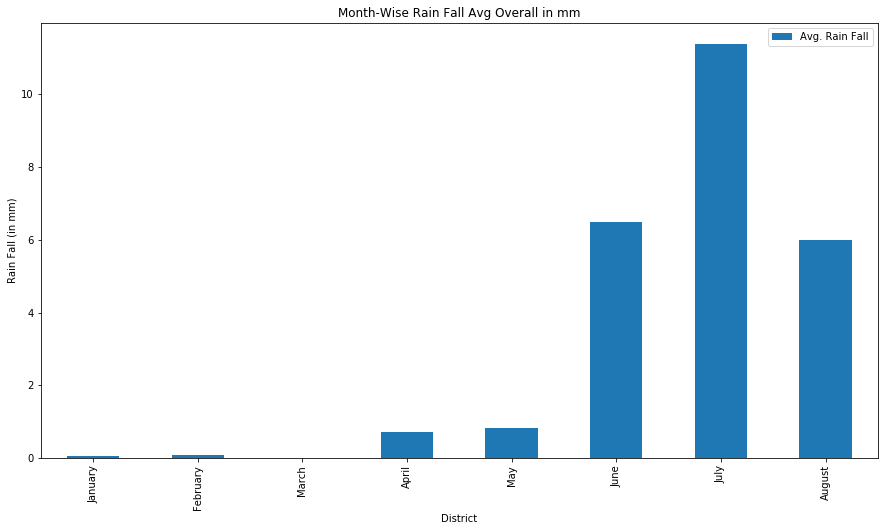

In [220]:
fig, ax = plt.subplots()
month_wise_avg_rainfall.plot(kind="bar", figsize=(15, 8), title="Month-Wise Rain Fall Avg Overall in mm", stacked=True, ax=ax)
ax.set(xlabel="Months", ylabel="Rain Fall (in mm)")
plt.legend(loc="upper right", ncol=len(month_wise_rainfall_data.columns))

# Inferences Drawn from the above graph:
- March has barely any rainfall
- July has the highest average rainfall
- June and August have the next best average rainfall

In [214]:
pivoted_rainfall = df.pivot_table("Min Humidity (%)", ["District"], ["Month"])
month_wise_min_humidity_data = pivoted_rainfall.reindex(["January", "February", "March", "April", "May", "June", "July", "August"], axis="columns")
avg_min_humidity_month_wise = pd.DataFrame(month_wise_min_humidity_data.mean(axis=0))
avg_min_humidity_month_wise.columns = ["Min Humidity"]
avg_min_humidity_month_wise

,Min Humidity
Month,
January,43.668536
February,31.434725
March,24.959569
April,28.666042
May,22.897959
June,54.949677
July,69.742138
August,67.346980


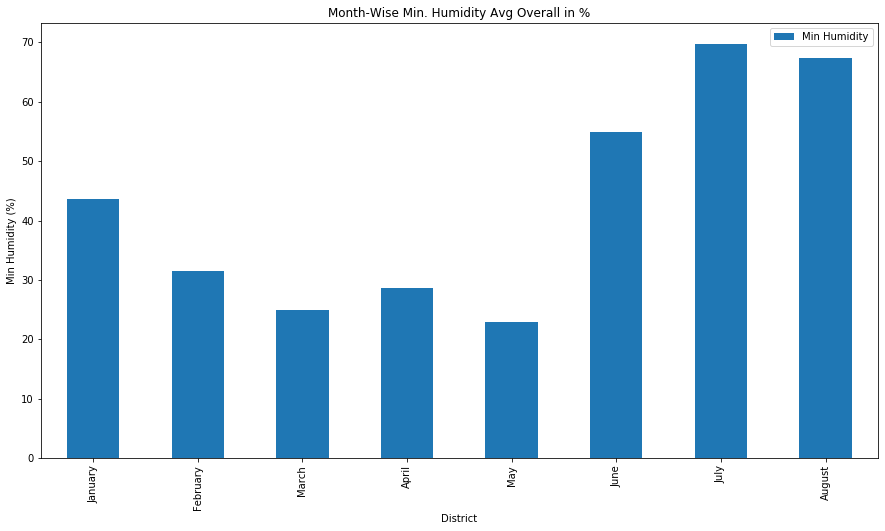

In [222]:
fig, ax = plt.subplots()
avg_min_humidity_month_wise.plot(kind="bar", figsize=(15, 8), title="Month-Wise Min. Humidity Avg Overall in %", stacked=True, ax=ax)
ax.set(xlabel="District", ylabel="Min Humidity (%)")
plt.legend(loc="upper right", ncol=len(month_wise_rainfall_data.columns))

# Inferences from the above graph:
- Telangana districts face the highest minimum humidity in July
- Telangana districts face the lowest minimum humidity in May
- July, August, June faces the highest minimum humidity
- Suprisingly, January has the 4th highest minimum humidity

In [223]:
pivoted_rainfall = df.pivot_table("Max Humidity (%)", ["District"], ["Month"])
month_wise_max_humidity_data = pivoted_rainfall.reindex(["January", "February", "March", "April", "May", "June", "July", "August"], axis="columns")
avg_max_humidity_month_wise = pd.DataFrame(month_wise_max_humidity_data.mean(axis=0))
avg_max_humidity_month_wise.columns = ["Max Humidity"]
avg_max_humidity_month_wise

,Max Humidity
Month,
January,95.059154
February,88.434696
March,80.214173
April,78.438825
May,52.544531
June,91.852226
July,95.676286
August,95.618097


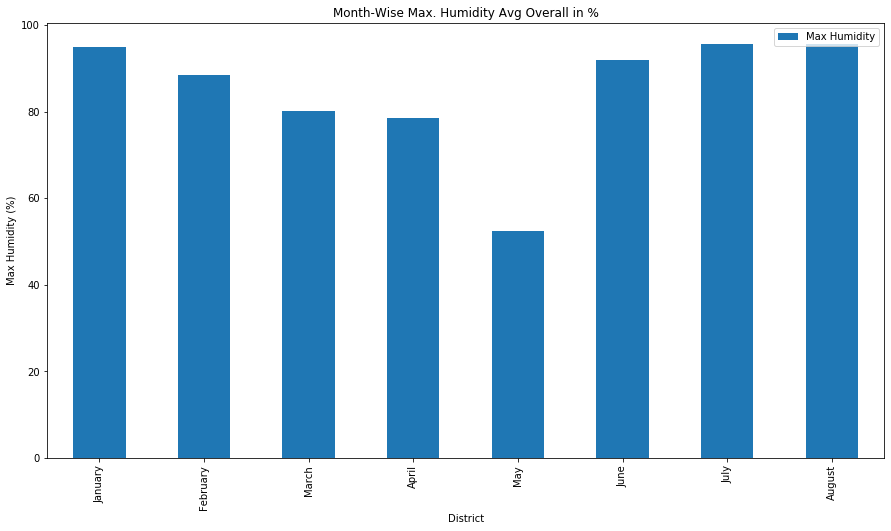

In [224]:
fig, ax = plt.subplots()
avg_max_humidity_month_wise.plot(kind="bar", figsize=(15, 8), title="Month-Wise Max. Humidity Avg Overall in %", stacked=True, ax=ax)
ax.set(xlabel="District", ylabel="Max Humidity (%)")
plt.legend(loc="upper right", ncol=len(month_wise_rainfall_data.columns))

# Inferences from the above graph:
- Telangana has the highest maximum humidity in July, followed by August and suprisingly January
- May once again has the least maximum humidity, but has minimum rainfall in Telangana

# Conclusion:

## Patterns detected:
1. Rainfall in March will most likely not occur. Rainfall in this month is non-existent in many areas.
2. Rainfall in June, July and August are most likely to occur.
3. Telangana has high humidity year-long with lowest humidity in May.
4. Kumuram Bheem District has highest rainfall average.